# Notebook that can take lat long inputs and generate weather report/forecast with charts for the location

In [36]:
import os
import json
import datetime
import requests
import pprint as pp
import plotly.express as px
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()


True

In [37]:
# !pip install python-dotenv

In [38]:

class WeatherClient:
    OPEN_WEATHER_MAP_API = os.environ.get('OPEN_WEATHER_MAP_API')
    DEFAULT_ZIP_CODE = '77056'
    DEFAULT_LAT = 29.76
    DEFAULT_LONG = 95.36

    @classmethod
    def get_seven_day_forecast(cls, lat_long=None):
        if not lat_long:
            lat_long = (cls.DEFAULT_LAT,cls.DEFAULT_LONG)

        try:
            # https://pro.openweathermap.org/data/2.5/forecast/hourly?lat={lat}&lon={lon}&appid={API key}

            URL = f'https://api.openweathermap.org/data/2.5/onecall?units=imperial&lat={lat_long[0]}&lon={lat_long[1]}&exclude=[current,minutely,hourly,alerts]&appid={cls.OPEN_WEATHER_MAP_API}'
            # print(URL)
            r = requests.get(URL)

            # pp.pprint(r.json())
            
            return r.json()
        except requests.exceptions.RequestException as e:
            print('Unable to get 4 day forecast')
            print(str(e))
            raise e

    @classmethod
    def get_seven_forecast_formatted(cls, lat_long=None) -> str:
        if not lat_long:
            lat_long = (cls.DEFAULT_LAT,cls.DEFAULT_LONG)

        forecasts = cls.get_seven_day_forecast(lat_long)
        lat_long = str(forecasts['lat'])+"_"+str(forecasts['lon'])
        formatted_forecasts = []

        # track 12 hour forecast each day
        for i in range(0, len(forecasts['daily'])):
            forecast = forecasts['daily'][i]
            # print(forecast)

            try:
                forecast_datetime = datetime.datetime.fromtimestamp(forecast['dt'])
                # forecast['dt_formatted'] = f'{forecast_datetime:%a, %b %d %-I:%M %p}'
                forecast['dt_formatted'] = f'{forecast_datetime:%d-%m-%Y}'
                
                forecast['weather_description'] = forecast['weather'][0]['description']
                forecast['weather_icon'] = cls.get_icon_url(forecast['weather'][0]['icon'])

                del forecast['dt']
                del forecast['feels_like']
                del forecast['weather']
                # del forecast['temp']

                formatted_forecasts.append(forecast)
            except KeyError as e:
                print(str(e))
                print('Unable to parse keys, skipping forecast')
            except Exception as e:
                print(str(e))
                print('Unable to format, skipping forecast')
        #pp.pprint(json.dumps({'lat_long': lat_long, 'forecasts': formatted_forecasts}))
        return json.dumps({'lat_long': lat_long, 'forecasts': formatted_forecasts})

    @classmethod
    def get_icon_url(cls, icon):
        return f'https://openweathermap.org/img/wn/{icon}@2x.png'

In [39]:
res = json.loads(WeatherClient.get_seven_forecast_formatted())
lat_long = res["lat_long"]
forecasts = res['forecasts']
pp.pprint(forecasts)

[{'clouds': 100,
  'dew_point': 28.36,
  'dt_formatted': '10-04-2022',
  'humidity': 55,
  'moon_phase': 0.28,
  'moonrise': 1649569320,
  'moonset': 1649532240,
  'pop': 0.98,
  'pressure': 1014,
  'rain': 5.22,
  'sunrise': 1649546270,
  'sunset': 1649592101,
  'temp': {'day': 42.93,
           'eve': 37.83,
           'max': 43.25,
           'min': 29.25,
           'morn': 29.39,
           'night': 32.76},
  'uvi': 10.35,
  'weather_description': 'moderate rain',
  'weather_icon': 'https://openweathermap.org/img/wn/10d@2x.png',
  'wind_deg': 172,
  'wind_gust': 8.9,
  'wind_speed': 7.34},
 {'clouds': 100,
  'dew_point': 35.83,
  'dt_formatted': '11-04-2022',
  'humidity': 76,
  'moon_phase': 0.31,
  'moonrise': 1649659140,
  'moonset': 1649621160,
  'pop': 1,
  'pressure': 1016,
  'rain': 3.17,
  'snow': 4.64,
  'sunrise': 1649632602,
  'sunset': 1649678537,
  'temp': {'day': 36.9,
           'eve': 39.31,
           'max': 43.61,
           'min': 28.62,
           'morn': 30.15

In [40]:
# get data for humidity, day temp, min temp, max temp, wind_speed, rain
from collections import defaultdict
lat_long_forecast_clean = defaultdict(list)
# lat_long_forecast_clean = dict()
for i in range (len(forecasts)):
    #pp.pprint(forecasts[i])
    lat_long_forecast_clean["date"].append(forecasts[i]['dt_formatted'])
    lat_long_forecast_clean['wind_speed'].append(forecasts[i]["wind_speed"])
    try:
        lat_long_forecast_clean['rain'].append(forecasts[i]["rain"])
    except Exception as ex:
         lat_long_forecast_clean['rain'].append(0)
    lat_long_forecast_clean['humidity'].append(forecasts[i]["humidity"])
    lat_long_forecast_clean['temp_day'].append(forecasts[i]['temp']["day"])
    lat_long_forecast_clean['temp_min'].append(forecasts[i]['temp']["min"])
    lat_long_forecast_clean['temp_max'].append(forecasts[i]['temp']["max"])
lat_long_forecast_clean

defaultdict(list,
            {'date': ['10-04-2022',
              '11-04-2022',
              '12-04-2022',
              '13-04-2022',
              '14-04-2022',
              '15-04-2022',
              '16-04-2022',
              '17-04-2022'],
             'wind_speed': [7.34, 4.32, 6.15, 8.7, 3.83, 4.74, 3.51, 1.25],
             'rain': [5.22, 3.17, 1.01, 3.39, 10.32, 12.65, 0, 0],
             'humidity': [55, 76, 39, 50, 73, 92, 99, 98],
             'temp_day': [42.93, 36.9, 48.6, 46.74, 40.77, 33.1, 27, 29.77],
             'temp_min': [29.25,
              28.62,
              23.47,
              32.07,
              32.09,
              29.98,
              24.37,
              24.98],
             'temp_max': [43.25,
              43.61,
              50.45,
              46.74,
              40.77,
              34.95,
              28.42,
              29.84]})

### Imperial units have been used for all weather data

In [41]:
fig = px.bar(lat_long_forecast_clean, x='date', y=['temp_day',"temp_max","temp_min","humidity","wind_speed",'rain']
             , barmode='group', title="Weather forecasts for next 7 days")
fig.show()

## Rain vs Temperature

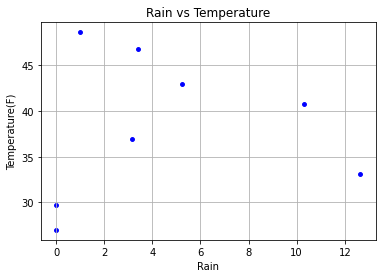

In [42]:
import matplotlib.pyplot as plt
plt.scatter(lat_long_forecast_clean["rain"], lat_long_forecast_clean["temp_day"], marker="o", s=15, color='blue')

#formating
plt.title("Rain vs Temperature")
plt.ylabel("Temperature(F)")
plt.xlabel("Rain")
plt.grid(True)



#show plot
plt.show()

## Rain vs Humidity

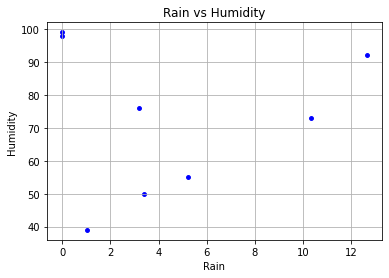

In [43]:

plt.scatter(lat_long_forecast_clean["rain"], lat_long_forecast_clean["humidity"], marker="o", s=15, color='blue')

#formating
plt.title("Rain vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Rain")
plt.grid(True)



#show plot
plt.show()

## Max Temperature vs Min Temperature

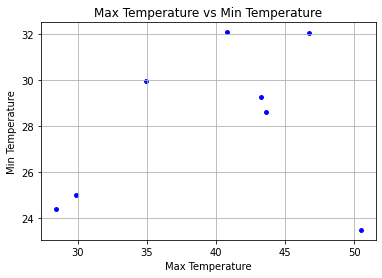

In [44]:
import matplotlib.pyplot as plt
plt.scatter(lat_long_forecast_clean["temp_max"], lat_long_forecast_clean["temp_min"], marker="o", s=15, color='blue')

#formating
plt.title("Max Temperature vs Min Temperature")
plt.ylabel("Min Temperature")
plt.xlabel("Max Temperature")
plt.grid(True)



#show plot
plt.show()